# Packages

In [7]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

#  Greedy modularity maximization

# The most direct way to tell how many communities there is in Facebook network is like so:


In [5]:
G_social =nx.read_edgelist('facebook_combined.txt',create_using=nx.Graph(),nodetype=int)
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
# Count the communities
print(f"The facebook ego has {len(communities)} communities.")

The facebook ego has 13 communities.


In [32]:
test=pd.DataFrame(communities)

In [44]:
test=test.transpose()
test=test.apply(pd.to_numeric)
test = test.fillna(-1).astype(int)
test


In [43]:
test.head(10)
# -1 means empty

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3261,107,857,2048,0,3073,2560,686,3980,901,640,3008,2817
1,3271,348,862,2049,1,3078,2561,687,3981,1798,643,2982,3074
2,3277,349,865,2050,2,3080,2563,688,3982,903,647,3423,3147
3,3280,350,868,2051,3,3084,2564,689,3983,1802,650,2699,3055
4,3281,352,1085,2052,4,3085,2055,690,3984,1548,658,3309,2774
5,3282,353,3437,2053,5,3090,2056,691,3985,1424,659,2670,3127
6,3291,354,3438,2054,6,3092,2059,692,3986,1568,661,3311,-1
7,3292,355,3439,2057,7,3095,2060,693,3987,1186,662,2959,-1
8,1290,356,3440,2058,8,3096,2573,694,3988,1314,665,2767,-1
9,3330,357,3441,2061,9,3098,2574,695,3989,1319,670,3314,-1


In [11]:
for l in range(1,12):
    b=list(communities[l])
    b= {i: l for i in b} 
    a.update(b)
a

{3261: 11,
 3271: 11,
 3277: 11,
 3280: 11,
 3281: 11,
 3282: 11,
 3291: 11,
 3292: 11,
 1290: 11,
 3330: 11,
 3335: 11,
 3336: 11,
 3337: 11,
 3338: 11,
 3350: 11,
 1317: 11,
 3354: 11,
 1321: 11,
 1323: 11,
 1325: 11,
 1327: 11,
 3368: 11,
 3373: 11,
 3376: 11,
 3378: 11,
 2661: 11,
 2662: 11,
 2665: 11,
 3379: 11,
 2667: 11,
 2668: 11,
 3380: 11,
 2671: 11,
 2672: 11,
 2674: 11,
 2675: 11,
 3381: 11,
 2677: 11,
 2678: 11,
 2975: 11,
 2682: 11,
 2684: 11,
 2685: 11,
 2686: 11,
 2687: 11,
 2688: 11,
 3383: 11,
 2690: 11,
 2691: 11,
 2692: 11,
 2693: 11,
 2696: 11,
 2697: 11,
 2700: 11,
 2701: 11,
 2702: 11,
 3038: 11,
 2707: 11,
 2708: 11,
 2709: 11,
 2711: 11,
 2712: 11,
 2713: 11,
 2714: 11,
 2715: 11,
 2716: 11,
 2718: 11,
 2719: 11,
 2720: 11,
 2721: 11,
 2722: 11,
 2723: 11,
 2724: 11,
 2725: 11,
 2727: 11,
 2728: 11,
 2730: 11,
 2732: 11,
 2733: 11,
 2734: 11,
 2735: 11,
 2736: 11,
 2737: 11,
 2739: 11,
 2742: 11,
 2744: 11,
 2747: 11,
 2748: 11,
 2751: 11,
 2752: 11,
 2753: 11,

<function matplotlib.pyplot.show(close=None, block=None)>

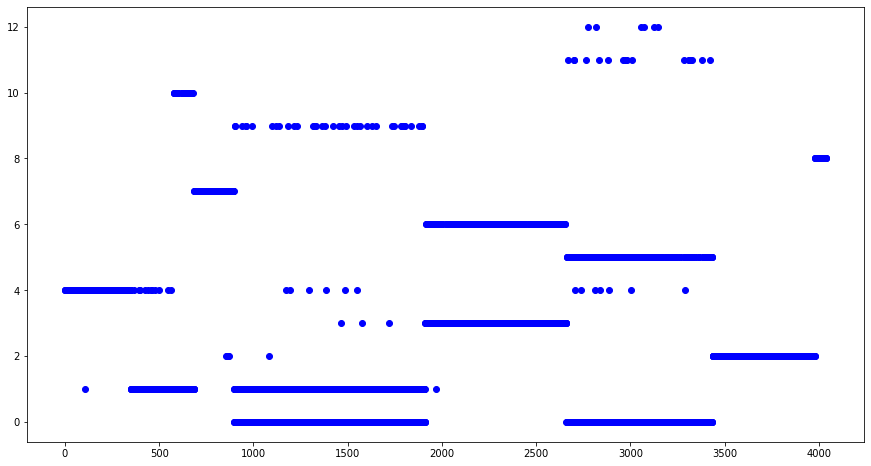

In [143]:
for i in range(0,4039):
    plt.scatter(i, a[i], color='blue')
plt.show

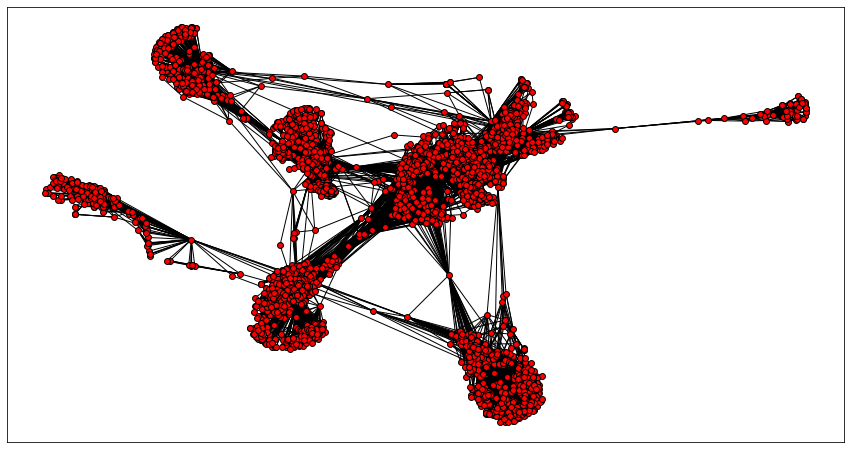

In [5]:
social_pos = nx.spring_layout(G_social)
plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw_networkx(G_social,pos=social_pos,node_color='red',with_labels=False,edgecolors='black',node_size=35)
plt.show()

# The output of the community detection consists of sets of vertex numbers (set of sets). If we wish to visualize this we need to define a few utilities. The methods simply assign the community number to the nodes and edges:

In [150]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)

# With this we now assign the community info to the elements:



In [151]:
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
    # Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

# To get an idea, let’s render it:





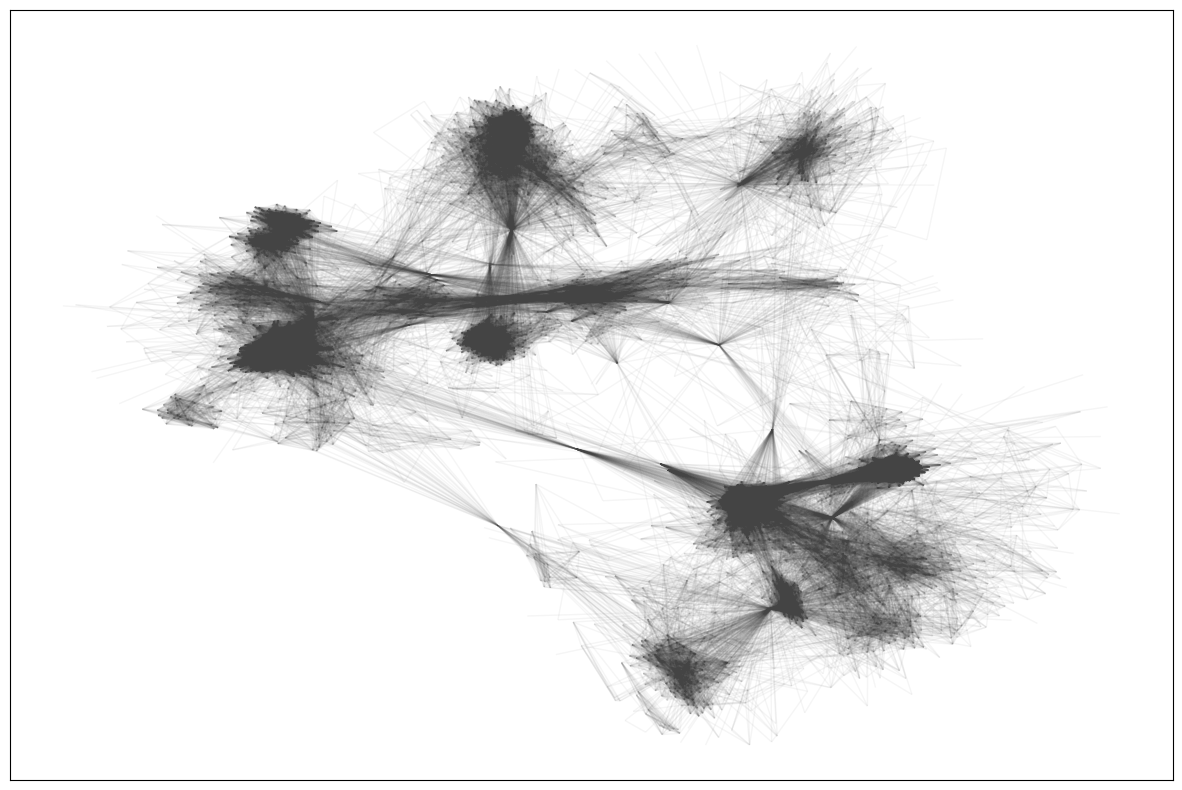

In [153]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        G_social,
        pos=pos,
        node_size=0,
        edge_color="#444444",
        alpha=0.05,
        with_labels=False)
plt.show()

In [144]:
import pandas as pd
influential = pd.read_csv("Data/res.csv")
inf10 = influential.head(10)

In [147]:
keyList = inf10.Node.tolist()
myDict = {key: key for key in keyList}

# and like above we can render them with the same utility methods



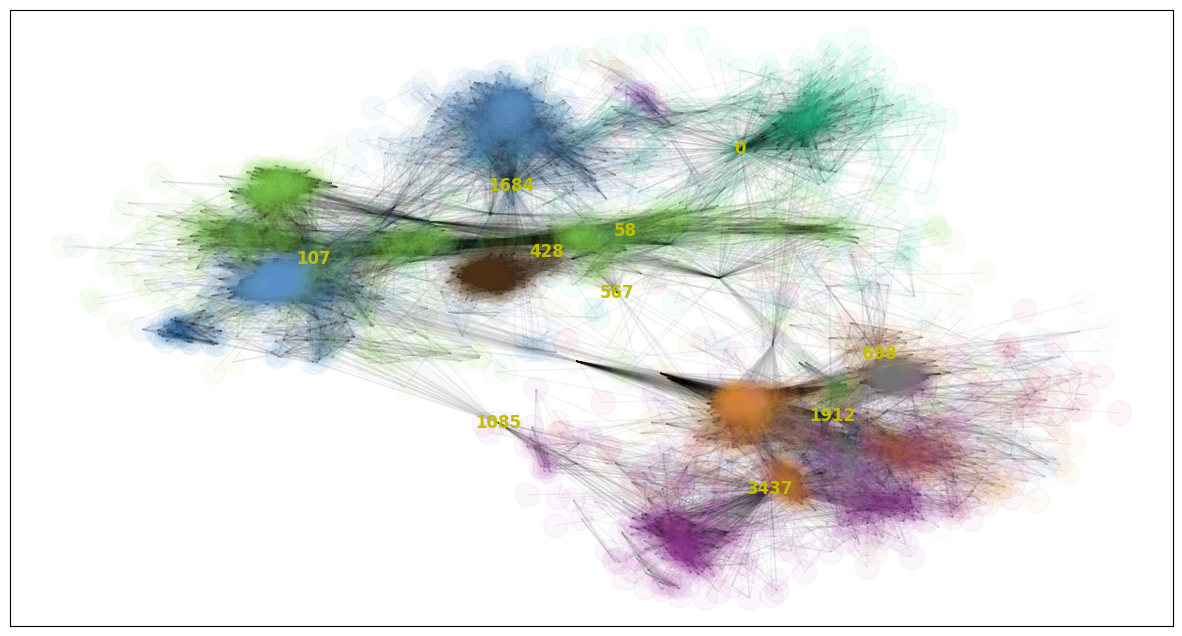

In [157]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 8)})
    # Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)
    # Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
    # external edges
nx.draw_networkx(
        G_social,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver",
        node_color=node_color,
        alpha=0.2,
        with_labels=False)
    # internal edges
nx.draw_networkx(
        G_social, pos=pos,
        edgelist=internal,
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05,
        with_labels=False)
labels=nx.draw_networkx_labels(G_social,pos = pos, labels=myDict, font_color='y', font_weight='bold')
plt.show()

# A little plot now gives a better idea of how the facebook ego communities are:



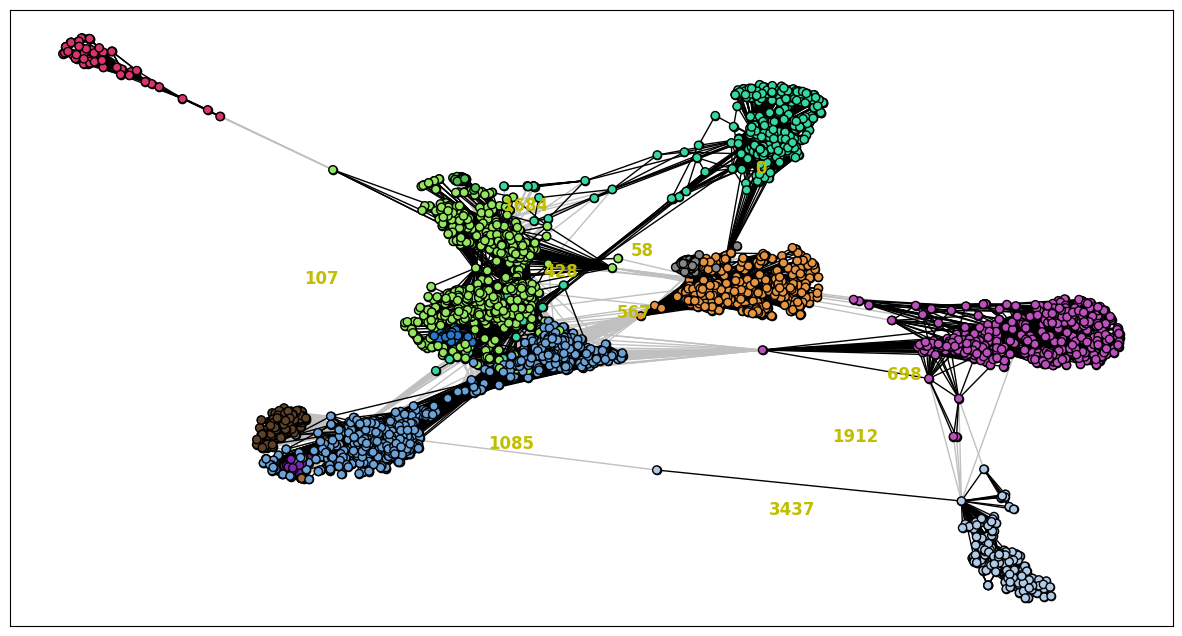

In [156]:
social_pos = nx.spring_layout(G_social)
plt.rcParams.update({'figure.figsize': (15, 8)})
    # Draw external edges
nx.draw_networkx(
        G_social,
        pos=social_pos,
        with_labels=False,
        font_size=8,
        edgelist=external,
        edgecolors='black',
        node_size=35,
        edge_color="silver")
    # Draw nodes and internal edges
nx.draw_networkx(
        G_social,
        pos=social_pos,
        with_labels=False,
        font_size=8,
        node_color=node_color,
        edgecolors='black',
        node_size=35,
        edgelist=internal,
        edge_color=internal_color)
plt.show()

## Louvain algo

In [45]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams.update({'figure.figsize': (15, 8)})
# define the graph
G = G_social



In [103]:
# retrun partition as a dict
partition = community_louvain.best_partition(G)

In [72]:
print(f"Based on Louvain Algorithm, The facebook ego has {len(set(partition.values()))} communities.")

Based on Louvain Algorithm, The facebook ego has 15 communities.


In [249]:
b=[value for key, key in partition.items() if key == 0]
b

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,

In [250]:
d.insert(0,"0",(b + [b]*len(d))[:len(d)], True)

In [251]:
d

,0,1,2,3,4,5,6,7,8,9,10,10,11,12,13,14,14
0,0,34,107,136,1684,389,900,1924,1085,1951,2543,2543,594,686,3304,2670,0
1,1,173,897,1912,3173,896,901,1988,3437,1972,2266,2266,3980,687,2663,2699,1
2,2,198,899,1465,990,898,903,1992,3454,1973,2347,2347,3989,688,2664,2703,2
3,3,348,904,1577,1140,902,908,2076,3487,1976,2542,2542,4011,689,2666,2767,3
4,4,414,906,1718,1450,913,909,2170,3723,1991,2468,2468,4031,690,2669,2834,4
5,5,428,907,1926,1505,914,923,2207,3861,1995,1917,1917,3981,691,2673,2879,5
6,6,353,911,1932,1534,917,928,2255,3961,1998,1918,1918,3982,692,2676,2889,6
7,7,363,916,1939,1642,919,929,2320,857,2001,1925,1925,3983,693,2679,2959,7
8,8,366,918,1945,1656,924,938,2349,862,2004,1929,1929,3984,694,2680,2972,8
9,9,376,920,1955,1666,933,950,2401,865,2009,1938,1938,3985,695,2681,2982,9


In [252]:
d2 = d.loc[:,~d.columns.duplicated()]

In [254]:
d2.style.hide_index()
#Communities and their nodes

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34,107,136,1684,389,900,1924,1085,1951,2543,594,686,3304,2670
1,173,897,1912,3173,896,901,1988,3437,1972,2266,3980,687,2663,2699
2,198,899,1465,990,898,903,1992,3454,1973,2347,3989,688,2664,2703
3,348,904,1577,1140,902,908,2076,3487,1976,2542,4011,689,2666,2767
4,414,906,1718,1450,913,909,2170,3723,1991,2468,4031,690,2669,2834
5,428,907,1926,1505,914,923,2207,3861,1995,1917,3981,691,2673,2879
6,353,911,1932,1534,917,928,2255,3961,1998,1918,3982,692,2676,2889
7,363,916,1939,1642,919,929,2320,857,2001,1925,3983,693,2679,2959
8,366,918,1945,1656,924,938,2349,862,2004,1929,3984,694,2680,2972
9,376,920,1955,1666,933,950,2401,865,2009,1938,3985,695,2681,2982


In [ ]:
# visualization
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, edgecolors='black',node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

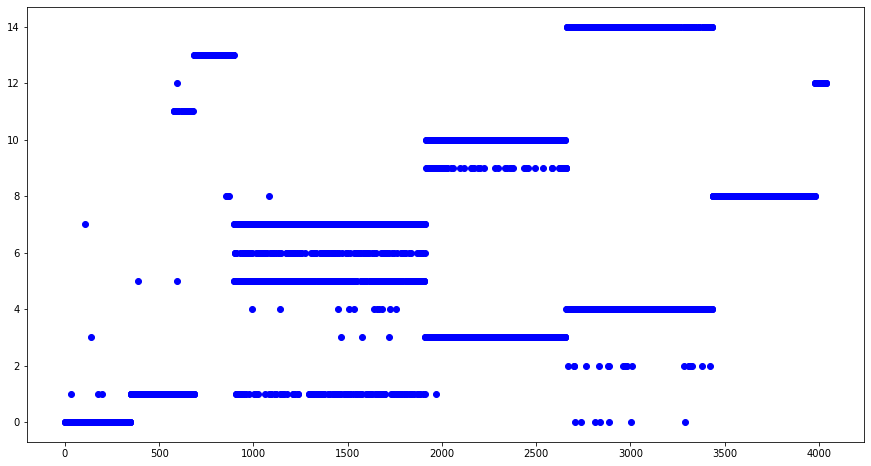

In [26]:
#Louvain plot
for i in range(0,4039):
    plt.scatter(i, partition[i], color='blue')
plt.show